In [155]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
df = pd.read_csv("Mall_Customers.csv")

# Explanation
For this project, I want to understand what are the main causes for a high or low spending score. We will use Unsupervised learning to udnerstand this outcome

In [157]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [158]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [159]:
df.isnull().values.any()

False

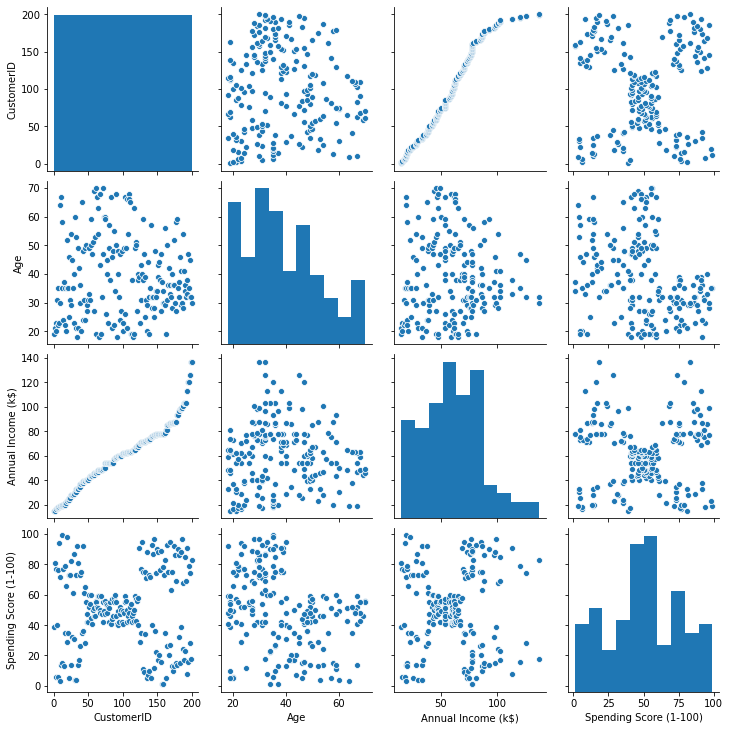

In [160]:
sns.pairplot(df)

# Gender

In [161]:
df.Gender.describe()

count        200
unique         2
top       Female
freq         112
Name: Gender, dtype: object

In [162]:
df.Gender = pd.get_dummies(df.Gender) # 1 is Male 0 is Female
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


([<matplotlib.patches.Wedge at 0x2bc40a09b80>,
 [Text(-0.21548852023467327, 1.1296303367239529, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')],
 [Text(-0.12179785926307618, 0.6384867120613645, '56.0%'),
  Text(0.11242879316591654, -0.5893723495951058, '44.0%')])

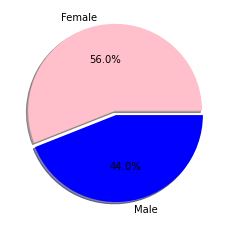

In [163]:
plt.pie([112, 88], labels=['Female', 'Male'], explode=[0.05,0], colors=['pink', 'blue'], shadow=True, autopct='%1.1f%%')

# Anual Income

In [164]:
df["Annual Income (k$)"].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

Text(0, 0.5, 'Frequency')

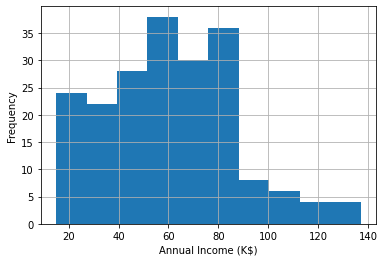

In [165]:
df["Annual Income (k$)"].hist()
plt.xlabel("Annual Income (K$)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Annual Income (k$)')

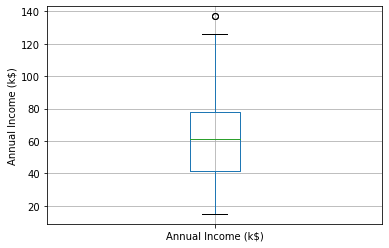

In [166]:
df.boxplot(column=["Annual Income (k$)"])
plt.ylabel("Annual Income (k$)")

# Age

In [167]:
df.Age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

Text(0, 0.5, 'Frequency')

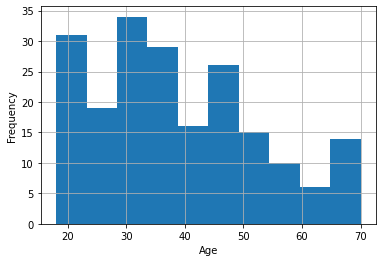

In [168]:
df.Age.hist()
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(0, 0.5, 'Age')

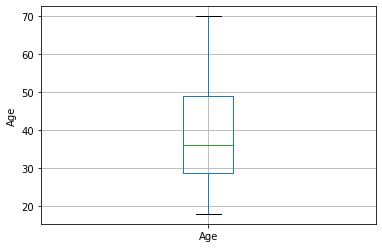

In [169]:
df.boxplot(column=["Age"])
plt.ylabel("Age")

# Spending Score

In [170]:
df["Spending Score (1-100)"].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

Text(0, 0.5, 'Frequency')

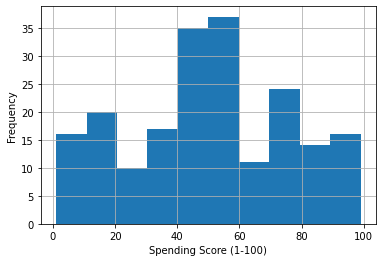

In [171]:
df["Spending Score (1-100)"].hist()
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Spending Score (1-100)')

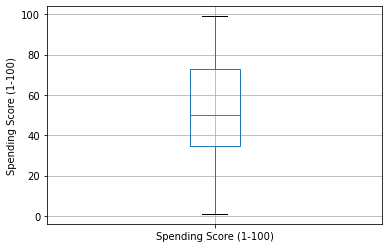

In [172]:
df.boxplot(column=["Spending Score (1-100)"])
plt.ylabel("Spending Score (1-100)")

In [173]:
df_original = df.drop(['CustomerID'], axis=1)
df_original

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [174]:
df = df.drop(['CustomerID'], axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [175]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(df[['Gender']])
df['Gender'] = mms.transform(df[['Gender']])

mms.fit(df[['Age']])
df['Age'] = mms.transform(df[['Age']])

mms.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = mms.transform(df[['Annual Income (k$)']])

mms.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = mms.transform(df[['Spending Score (1-100)']])


In [176]:
# Sum Squared dist calculation to get the best cluster size
sum_squared_dist = []
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    sum_squared_dist.append(km.inertia_)

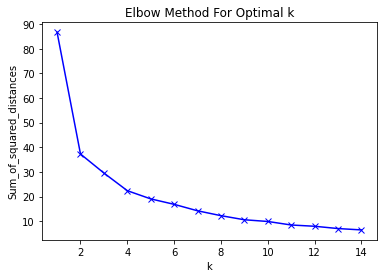

In [177]:
plt.plot(range(1,15), sum_squared_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Number of Cluster
Since, the "elbow" in this graph appears to be between 4 and 8, I will be using a n_clusters of 6.

In [178]:
n_clusters = 4
km = KMeans(n_clusters=n_clusters)
y_predict = km.fit_predict(df)
y_predict

array([1, 1, 2, 0, 0, 0, 2, 0, 3, 0, 3, 0, 2, 0, 3, 1, 2, 1, 3, 0, 3, 1,
       2, 1, 2, 1, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0, 2, 0, 2, 0, 2, 1, 3, 0,
       2, 0, 2, 0, 0, 0, 2, 1, 0, 3, 2, 3, 2, 3, 0, 3, 3, 1, 2, 2, 3, 1,
       2, 2, 1, 0, 3, 2, 2, 2, 3, 1, 2, 3, 0, 2, 3, 1, 3, 2, 0, 3, 2, 0,
       0, 2, 2, 1, 3, 2, 0, 1, 2, 0, 3, 1, 0, 2, 3, 1, 3, 0, 2, 3, 3, 3,
       3, 0, 2, 1, 0, 0, 2, 2, 2, 2, 1, 2, 0, 1, 0, 0, 3, 1, 3, 1, 3, 1,
       0, 0, 3, 0, 2, 1, 3, 0, 2, 1, 0, 0, 3, 1, 3, 0, 2, 1, 3, 1, 2, 0,
       2, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 2, 1, 3, 1, 3, 1, 2, 0,
       3, 1, 3, 1, 2, 0, 3, 0, 2, 1, 2, 1, 2, 0, 2, 0, 3, 0, 2, 0, 2, 1,
       3, 1])

In [179]:
df['Cluster'] = y_predict
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0.0,0.019231,0.000000,0.387755,1
1,0.0,0.057692,0.000000,0.816327,1
2,1.0,0.038462,0.008197,0.051020,2
3,1.0,0.096154,0.008197,0.775510,0
4,1.0,0.250000,0.016393,0.397959,0
...,...,...,...,...,...
195,1.0,0.326923,0.860656,0.795918,0
196,1.0,0.519231,0.909836,0.275510,2
197,0.0,0.269231,0.909836,0.744898,1
198,0.0,0.269231,1.000000,0.173469,3


In [180]:
km.cluster_centers_

array([[1.00000000e+00, 2.00742240e-01, 3.66120219e-01, 6.80451128e-01],
       [1.11022302e-16, 1.97115385e-01, 3.85245902e-01, 7.21173469e-01],
       [1.00000000e+00, 5.79020979e-01, 3.59165425e-01, 3.44712430e-01],
       [4.44089210e-16, 6.04567308e-01, 3.88661202e-01, 2.87840136e-01]])

# Age

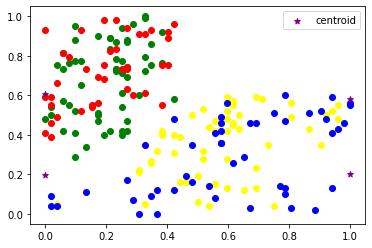

In [181]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]
df3 = df[df.Cluster == 3]
plt.scatter(df0["Age"],df0["Spending Score (1-100)"],color='green')
plt.scatter(df1["Age"],df1["Spending Score (1-100)"],color='red')
plt.scatter(df2["Age"],df2["Spending Score (1-100)"],color='yellow')
plt.scatter(df3["Age"],df3["Spending Score (1-100)"],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()


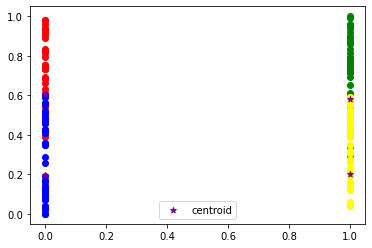

In [182]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]
df3 = df[df.Cluster == 3]
plt.scatter(df0["Gender"],df0["Spending Score (1-100)"],color='green')
plt.scatter(df1["Gender"],df1["Spending Score (1-100)"],color='red')
plt.scatter(df2["Gender"],df2["Spending Score (1-100)"],color='yellow')
plt.scatter(df3["Gender"],df3["Spending Score (1-100)"],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

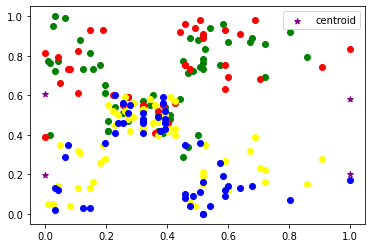

In [183]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]
df3 = df[df.Cluster == 3]
plt.scatter(df0["Annual Income (k$)"],df0["Spending Score (1-100)"],color='green')
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],color='red')
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"],color='yellow')
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

# Analysis
As we can see in the graphs, the clustering analysis is made by the combination of the 4 parameters "Age", "Gender", "Anual Income", and "Spending Score". In the visualizations above, I compared each parameter with the Spending Score, but this would not be visualy good because we used 4 parameters to get the results. This means that the graph will be visualy pleasable in 4-D. To demonstrate this, we will be using the same approach this time using only the "Annual Income" and "Spending Score"

# PART 2

In [319]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [320]:
df_analysis = df.drop(['CustomerID', 'Gender', 'Age'],axis=1)
df_analysis

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [321]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_analysis[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [324]:
df_analysis['Cluster'] = y_predicted
df_analysis

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,1
1,15,81,1
2,16,6,1
3,16,77,1
4,17,40,1
...,...,...,...
195,120,79,0
196,126,28,2
197,126,74,0
198,137,18,2


In [325]:
km.cluster_centers_

array([[86.53846154, 82.12820513],
       [44.15447154, 49.82926829],
       [87.        , 18.63157895]])

In [326]:
mms = MinMaxScaler()

mms.fit(df_analysis[['Annual Income (k$)']])
df_analysis['Annual Income (k$)'] = mms.transform(df_analysis[['Annual Income (k$)']])

mms.fit(df_analysis[['Spending Score (1-100)']])
df_analysis['Spending Score (1-100)'] = mms.transform(df_analysis[['Spending Score (1-100)']])

In [327]:
sum_squared_dist = []
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km = km.fit(df_analysis)
    sum_squared_dist.append(km.inertia_)

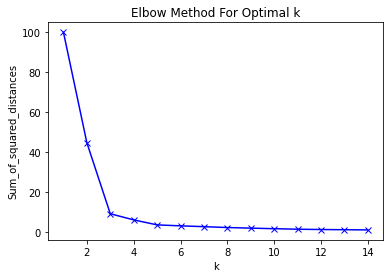

In [328]:
plt.plot(range(1,15), sum_squared_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [329]:
# We can see that the elbow is at n_cluster=5
n_clusters = 3
km = KMeans(n_clusters=n_clusters)
y_predict = km.fit_predict(df_analysis)
y_predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [330]:
df_analysis['Cluster'] = y_predict
df_analysis

,Annual Income (k$),Spending Score (1-100),Cluster
0,0.000000,0.387755,2
1,0.000000,0.816327,2
2,0.008197,0.051020,2
3,0.008197,0.775510,2
4,0.016393,0.397959,2
...,...,...,...
195,0.860656,0.795918,1
196,0.909836,0.275510,0
197,0.909836,0.744898,1
198,1.000000,0.173469,0


In [331]:
km.cluster_centers_

array([[5.90163934e-01, 1.79914071e-01, 2.00000000e+00],
       [5.86380832e-01, 8.27838828e-01, 2.22044605e-16],
       [2.38971078e-01, 4.98257840e-01, 1.00000000e+00]])

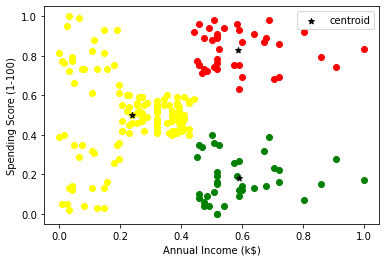

In [332]:
df0 = df_analysis[df_analysis.Cluster == 0]
df1 = df_analysis[df_analysis.Cluster == 1]
df2 = df_analysis[df_analysis.Cluster == 2]
df3 = df_analysis[df_analysis.Cluster == 3]
df4 = df_analysis[df_analysis.Cluster == 4]
plt.scatter(df0["Annual Income (k$)"],df0["Spending Score (1-100)"],color='green')
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],color='red')
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"],color='yellow')
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],color='blue')
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

As specified before, now that we used only 2 parameters in this Kmeans algortihm we are able to see a clear relationship with the centroids and the clusters. Although the calculation for the number of clusters was 3 in the Elbow Method, we can see how there are 5 clusters in the graph, but the relation is not as strong. Since K-means is a clustering method using unsupervised learning, we can't get the accuracy of the model by a given method, but all the points appear to be part of the closest centroid.